# LTL-f BASED-TRACE ALIGNMENT

From constraint to LTL-f: http://www.diag.uniroma1.it/degiacom/papers/2014/AAAI14.pdf

From LTL-f to DFA: http://ltlf2dfa.diag.uniroma1.it/

From LTL-f to automaton: https://github.com/whitemech/logaut

LTL2DFA library: https://github.com/whitemech/LTLf2DFA/

In [5]:
from logaut import ltl2dfa
from pylogics.parsers import parse_ltl

## Load xes file
containing the trace

In [5]:
log_path = "dataset/logs/synthetic-logs/10constraints/1-constraint-inverted/log-from-10constr-model-1constr_inverted-1-50.xes"

In [6]:
# Effettua la mappatura tra il numero dell'attività e una lettera dell'alfabeto
def convertNumberToChar (val):
    if (val == 1):
        return "a";
    elif (val == 2):
        return "b";
    elif (val == 3):
        return "c";
    elif (val == 4):
        return "d";
    elif (val == 5):
        return "e";
    elif (val == 6):
        return "f";
    elif (val == 7):
        return "g";
    elif (val == 8):
        return "h";
    elif (val == 9):
        return "i";
    elif (val == 10):
        return "j";
    elif (val == 11):
        return "k";
    elif (val == 12):
        return "l";
    elif (val == 13):
        return "m";
    elif (val == 14):
        return "n";
    elif (val == 15):
        return "o";
    elif (val == 16):
        return "p";
    elif (val == 17):
        return "q";
    elif (val == 18):
        return "r";
    elif (val == 19):
        return "s";
    elif (val == 20):
        return "t";
    elif (val == 21):
        return "u";
    elif (val == 22):
        return "v";
    elif (val == 23):
        return "w";
    elif (val == 24):
        return "x";
    elif (val == 25):
        return "y";
    elif (val == 26):
        return "z";
    else:
        return val;


# Legge dal file .xes, estrapola le tracce, trasforma il valore delle tracce in caratteri,
# infine aggiungile al log sottoforma di stringhe
def readLog (log_path):
    # Inizializzazione variabili
    flag = False;           # Indica quando dobbiamo leggere un evento dal file
    trace = [];             # Lista di eventi sottoforma di interi
    traceChar = [];         # Lista di eventi sottoforma di char
    traceString = "";       # Stringa composta da eventi sottoforma di char
    log = []               # Lista di tracce ognuna delle quali è una stringa di char

    # Apriamo il file e leggiamolo riga per riga
    f = open  (log_path)
    f1 = f.readlines()
    
    # Per ogni riga del file...
    for x in f1:
        # Se c'è un evento, attiviamo la flag
        if (x.__contains__("<event>")):
            flag = True
        # Se flag attiva e siamo sulla riga dove è presente il nome dell'evento,
        # estrapoliamo il nome dell'evento e appendiamolo a trace
        if (flag and x.__contains__('<string key="concept:name"')):
            val = x.split('value="activity ',1)[1]
            val = val.split('"')[0]                
            trace.append(val)
            flag = False
        # Quando non ci sono più eventi possiamo lavorare sulla traccia in questione
        if (x.__contains__("</trace>")):
            for event in trace:
                traceChar.append(convertNumberToChar(int(event)))  # Converti gli eventi in char 
            traceString = "".join(traceChar)                       # Lista di eventi -> stringa
            log.append(traceString)                                # Appendi stringa a log

            # Inizializza nuovamente le variabili
            trace = []
            traceChar = []
            traceString = ""
    return log

In [7]:
log = readLog(log_path) # list of traces

#trace = log[2]
trace = 'stai'
print (trace)

stai


## Trace automaton

TRACE AUTOMATON
* $\Sigma^+_t$ = tutte le lettere della traccia + add_p and del_p per tutte le p
* $Q_t$ = tutti gli stati (da $q_0$ a $q_n$) 
* $\rho^+_t = UNION (q^t_i, p_{i+1}, q^t_{i+1})$ + $(q^t_i, del\_p_{i+1}, q^t_{i+1})$ and $(q^t_i, add\_p_{i+1}, q^t_{i+1})$ per tutte le p
* $F^t = \{q^t_n\}$

In [8]:
symbols_trace = list(set(trace))

print(trace)
print(symbols_trace)

stai
['s', 't', 'i', 'a']


In [9]:
rho_trace_basic = []           # rho = [[q0, w, q1],[q1,k,q2],...,[..,.,qn-1]]
Q_trace = []
for i in range(len(trace)):
    Q_trace.append('t'+str(i))
    rho_trace_basic.append('t'+str(i)+" "+trace[i] +" "+ 't'+str(i+1))

Q_trace.append('t'+str(len(trace)))
init_state_trace = Q_trace[0]
final_state_trace = Q_trace[-1]

print(Q_trace)
print(rho_trace_basic)

['t0', 't1', 't2', 't3', 't4']
['t0 s t1', 't1 t t2', 't2 a t3', 't3 i t4']


## Constraint automaton

**CONSTRAINTS**

- [x] Chain precedence activity 16 - 17  \\
- [x] Existence activity 1 \\
- [x] Precedence activity 9 -10 \\
- [x] Responded existence activity 5 - 6 \\
- [x] Chain response activity 14 - 15 \\
- [x] Not co-existence activity 19 -20 \\
- [x] Not succession activity 20 -21 \\
- [ ] Not chain succession activity 22 - 23 \\
- [x] Response activity 11 - 12 \\
- [x] Absence2 activity 2 \\


CONSTRAINT AUTOMATON
* $\Sigma^+$ = $\Sigma^+_t$
* $Q_t$ = tutti gli stati (da $q_0$ a $q_n$) 
* $\rho^+ = transizioni + (q, del\_p, q)$ and $(q, add\_p, q')$ per tutte le p
* $F$ = set final states

In [12]:
constraint_formulas = {'existence':'F (a)', 'absence2':'!(F((b & X(F(b)))))', 'response':'G ( k -> F(l) )'}

for name,f in constraint_formulas.items():
    formula = parse_ltl(f)
    dfa = ltl2dfa(formula, backend= "ltlf2dfa")
    dfa.to_graphviz().render(name+ ".dfa", view=True)

Exception: cannot find automaton description in MONA output.

### Existence
Fa

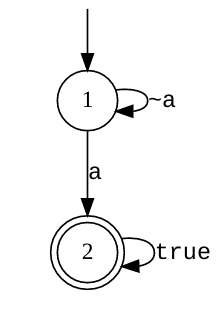

In [11]:
symbols_constr = symbols_trace.copy()
type_constr = 'existence'
Q_constr = {}
Q_constr[type_constr] = ['s0', 's1']
final_states_constr = {}
final_states_constr[type_constr] = ['s1']
init_states_constr = {}
init_states_constr[type_constr] = 's0'
#rho_constr = []
rho_constr_basic = {}
rho_constr_basic[type_constr] = []
check_elem = 'a'

if (check_elem not in symbols_constr):
    symbols_constr.append(check_elem)

for i in range(len(symbols_constr)):
    if (symbols_constr[i] == check_elem):
        rho_constr_basic[type_constr].append('s0 '+symbols_constr[i]+' s1')
    else:
        rho_constr_basic[type_constr].append('s0 '+symbols_constr[i]+' s0')

    rho_constr_basic[type_constr].append('s1 '+symbols_constr[i]+' s1')


print(rho_constr_basic[type_constr])

['s0 s s0', 's1 s s1', 's0 t s0', 's1 t s1', 's0 i s0', 's1 i s1', 's0 a s1', 's1 a s1']


### Absence2
!(F((b & X(F(b)))))

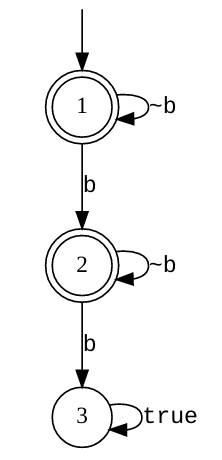


In [12]:
type_constr = 'absence2'
Q_constr[type_constr] = ['s2', 's3', 's4']
final_states_constr[type_constr] = ['s2', 's3']
init_states_constr[type_constr] = 's2'
rho_constr_basic[type_constr] = []
check_elem = 'b'

if (check_elem not in symbols_constr):
    symbols_constr.append(check_elem)

for i in range(len(symbols_constr)):
    if (symbols_constr[i] == check_elem):
        rho_constr_basic[type_constr].append('s2 '+symbols_constr[i]+' s3')
        rho_constr_basic[type_constr].append('s3 '+symbols_constr[i]+' s4')
    else:
        rho_constr_basic[type_constr].append('s2 '+symbols_constr[i]+' s2')
        rho_constr_basic[type_constr].append('s3 '+symbols_constr[i]+' s3')

    rho_constr_basic[type_constr].append('s4 '+symbols_constr[i]+' s4')


print(rho_constr_basic[type_constr])

['s2 s s2', 's3 s s3', 's4 s s4', 's2 t s2', 's3 t s3', 's4 t s4', 's2 i s2', 's3 i s3', 's4 i s4', 's2 a s2', 's3 a s3', 's4 a s4', 's2 b s3', 's3 b s4', 's4 b s4']


### Response
G ( k => F(l) )

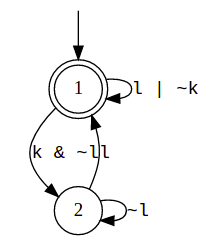

In [13]:
type_constr = 'response'
Q_constr[type_constr] = ['s5', 's6']
final_states_constr[type_constr] = ['s5']
init_states_constr[type_constr] = 's5'
rho_constr_basic[type_constr] = []
check_elem1 = 'k'
check_elem2 = 'l'

if (check_elem1 not in symbols_constr):
    symbols_constr.append(check_elem1)
if (check_elem2 not in symbols_constr):
    symbols_constr.append(check_elem2)

for i in range(len(symbols_constr)):
    if (symbols_constr[i] == check_elem2 or symbols_constr[i] != check_elem1):
        rho_constr_basic[type_constr].append('s5 '+symbols_constr[i]+' s5')
    if (symbols_constr[i] == check_elem2):
        rho_constr_basic[type_constr].append('s6 '+symbols_constr[i]+' s5')
    if (symbols_constr[i] == check_elem1 and (symbols_constr[i] != check_elem2)):
        rho_constr_basic[type_constr].append('s5 '+symbols_constr[i]+' s6')
    if (symbols_constr[i] != check_elem2):
        rho_constr_basic[type_constr].append('s6 '+symbols_constr[i]+' s6')
        

print(rho_constr_basic[type_constr])

['s5 s s5', 's6 s s6', 's5 t s5', 's6 t s6', 's5 i s5', 's6 i s6', 's5 a s5', 's6 a s6', 's5 b s5', 's6 b s6', 's5 k s6', 's6 k s6', 's5 l s5', 's6 l s5']


### Precedence 

not j W i = ((!(j) U i) | G(!(j)))

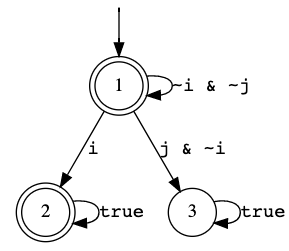

In [14]:
type_constr = 'precedence'
Q_constr[type_constr] = ['s7', 's8', 's9']
final_states_constr[type_constr] = ['s7','s8']
init_states_constr[type_constr] = 's7'
rho_constr_basic[type_constr] = []
check_elem1 = 'i'
check_elem2 = 'j'

if (check_elem1 not in symbols_constr):
    symbols_constr.append(check_elem1)
if (check_elem2 not in symbols_constr):
    symbols_constr.append(check_elem2)

for i in range(len(symbols_constr)):
    if (symbols_constr[i] != check_elem2 and symbols_constr[i] != check_elem1):
        rho_constr_basic[type_constr].append('s7 '+symbols_constr[i]+' s7')
    if (symbols_constr[i] == check_elem1):
        rho_constr_basic[type_constr].append('s7 '+symbols_constr[i]+' s8')
    if (symbols_constr[i] == check_elem2 and (symbols_constr[i] != check_elem1)):
        rho_constr_basic[type_constr].append('s7 '+symbols_constr[i]+' s9')
    
    rho_constr_basic[type_constr].append('s8 '+symbols_constr[i]+' s8')
    rho_constr_basic[type_constr].append('s9 '+symbols_constr[i]+' s9')
        

print(rho_constr_basic[type_constr])

['s7 s s7', 's8 s s8', 's9 s s9', 's7 t s7', 's8 t s8', 's9 t s9', 's7 i s8', 's8 i s8', 's9 i s9', 's7 a s7', 's8 a s8', 's9 a s9', 's7 b s7', 's8 b s8', 's9 b s9', 's7 k s7', 's8 k s8', 's9 k s9', 's7 l s7', 's8 l s8', 's9 l s9', 's7 j s9', 's8 j s8', 's9 j s9']


### Chain response 

G((n -> X(o)))


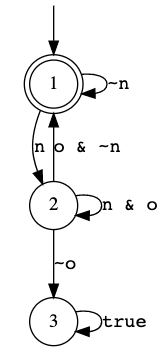

In [15]:
type_constr = 'chain_response'
Q_constr[type_constr] = ['s10', 's11', 's12']
final_states_constr[type_constr] = ['s10']
init_states_constr[type_constr] = 's10'
rho_constr_basic[type_constr] = []
check_elem1 = 'n'
check_elem2 = 'o'

if (check_elem1 not in symbols_constr):
    symbols_constr.append(check_elem1)
if (check_elem2 not in symbols_constr):
    symbols_constr.append(check_elem2)

for i in range(len(symbols_constr)):
    if (symbols_constr[i] != check_elem1):
        rho_constr_basic[type_constr].append('s10 '+symbols_constr[i]+' s10')
    if (symbols_constr[i] == check_elem1):
        rho_constr_basic[type_constr].append('s10 '+symbols_constr[i]+' s11')
    if (symbols_constr[i] == check_elem2 and (symbols_constr[i] != check_elem1)):
        rho_constr_basic[type_constr].append('s11 '+symbols_constr[i]+' s10')
    if (symbols_constr[i] != check_elem2):
        rho_constr_basic[type_constr].append('s11 '+symbols_constr[i]+' s12')
    
    rho_constr_basic[type_constr].append('s12 '+symbols_constr[i]+' s12')
        

print(rho_constr_basic[type_constr])

['s10 s s10', 's11 s s12', 's12 s s12', 's10 t s10', 's11 t s12', 's12 t s12', 's10 i s10', 's11 i s12', 's12 i s12', 's10 a s10', 's11 a s12', 's12 a s12', 's10 b s10', 's11 b s12', 's12 b s12', 's10 k s10', 's11 k s12', 's12 k s12', 's10 l s10', 's11 l s12', 's12 l s12', 's10 j s10', 's11 j s12', 's12 j s12', 's10 n s11', 's11 n s12', 's12 n s12', 's10 o s10', 's11 o s10', 's12 o s12']


### Responded existence

(F(e) -> F(f))


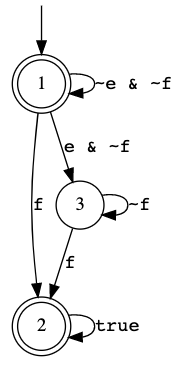

In [16]:
type_constr = 'responded_existence'
Q_constr[type_constr] = ['s13', 's14', 's15']
final_states_constr[type_constr] = ['s13', 's14']
init_states_constr[type_constr] = 's13'
rho_constr_basic[type_constr] = []
check_elem1 = 'e'
check_elem2 = 'f'

if (check_elem1 not in symbols_constr):
    symbols_constr.append(check_elem1)
if (check_elem2 not in symbols_constr):
    symbols_constr.append(check_elem2)

for i in range(len(symbols_constr)):
    if (symbols_constr[i] != check_elem1 and (symbols_constr[i] != check_elem2)):
        rho_constr_basic[type_constr].append('s13 '+symbols_constr[i]+' s13')
    if (symbols_constr[i] == check_elem2):
        rho_constr_basic[type_constr].append('s13 '+symbols_constr[i]+' s14')
    if (symbols_constr[i] == check_elem1 and (symbols_constr[i] != check_elem2)):
        rho_constr_basic[type_constr].append('s13 '+symbols_constr[i]+' s15')
    if (symbols_constr[i] != check_elem2):
        rho_constr_basic[type_constr].append('s15 '+symbols_constr[i]+' s15')
    if (symbols_constr[i] == check_elem2):
        rho_constr_basic[type_constr].append('s15 '+symbols_constr[i]+' s14')
    
    rho_constr_basic[type_constr].append('s14 '+symbols_constr[i]+' s14')
        

print(rho_constr_basic[type_constr])

['s13 s s13', 's15 s s15', 's14 s s14', 's13 t s13', 's15 t s15', 's14 t s14', 's13 i s13', 's15 i s15', 's14 i s14', 's13 a s13', 's15 a s15', 's14 a s14', 's13 b s13', 's15 b s15', 's14 b s14', 's13 k s13', 's15 k s15', 's14 k s14', 's13 l s13', 's15 l s15', 's14 l s14', 's13 j s13', 's15 j s15', 's14 j s14', 's13 n s13', 's15 n s15', 's14 n s14', 's13 o s13', 's15 o s15', 's14 o s14', 's13 e s15', 's15 e s15', 's14 e s14', 's13 f s14', 's15 f s14', 's14 f s14']


### Chain precedence

Modified version of the formula: (!(q) & G((X(q) -> p))) \\
In this way we do not accept traces which begin with "q".

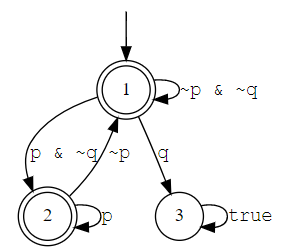

In [17]:
type_constr = 'chain_precedence'
Q_constr[type_constr] = ['s16', 's17', 's18']
final_states_constr[type_constr] = ['s16', 's17']
init_states_constr[type_constr] = 's16'
rho_constr_basic[type_constr] = []
check_elem1 = 'p'
check_elem2 = 'q'

if (check_elem1 not in symbols_constr):
    symbols_constr.append(check_elem1)
if (check_elem2 not in symbols_constr):
    symbols_constr.append(check_elem2)

for i in range(len(symbols_constr)):
    if (symbols_constr[i] != check_elem1 and (symbols_constr[i] != check_elem2)):
        rho_constr_basic[type_constr].append('s16 '+symbols_constr[i]+' s16')
    if (symbols_constr[i] == check_elem1 and (symbols_constr[i] != check_elem2)):
        rho_constr_basic[type_constr].append('s16 '+symbols_constr[i]+' s17')
    if (symbols_constr[i] == check_elem1):
        rho_constr_basic[type_constr].append('s17 '+symbols_constr[i]+' s17')
    if (symbols_constr[i] != check_elem1):
        rho_constr_basic[type_constr].append('s17 '+symbols_constr[i]+' s16')
    if (symbols_constr[i] == check_elem2):
        rho_constr_basic[type_constr].append('s16 '+symbols_constr[i]+' s18')
    
    rho_constr_basic[type_constr].append('s18 '+symbols_constr[i]+' s18')
        

print(rho_constr_basic[type_constr])

['s16 s s16', 's17 s s16', 's18 s s18', 's16 t s16', 's17 t s16', 's18 t s18', 's16 i s16', 's17 i s16', 's18 i s18', 's16 a s16', 's17 a s16', 's18 a s18', 's16 b s16', 's17 b s16', 's18 b s18', 's16 k s16', 's17 k s16', 's18 k s18', 's16 l s16', 's17 l s16', 's18 l s18', 's16 j s16', 's17 j s16', 's18 j s18', 's16 n s16', 's17 n s16', 's18 n s18', 's16 o s16', 's17 o s16', 's18 o s18', 's16 e s16', 's17 e s16', 's18 e s18', 's16 f s16', 's17 f s16', 's18 f s18', 's16 p s17', 's17 p s17', 's18 p s18', 's17 q s16', 's16 q s18', 's18 q s18']


### Not coexistence

!((F(s) & F(t)))

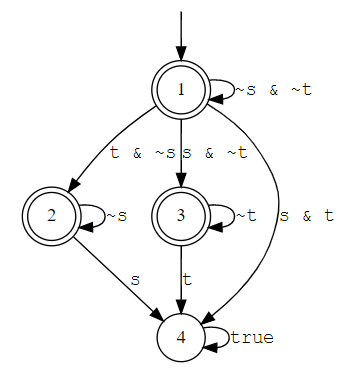

In [18]:
type_constr = 'not_coexistence'
Q_constr[type_constr] = ['s19', 's20', 's21','s22']
final_states_constr[type_constr] = ['s19', 's20', 's21']
init_states_constr[type_constr] = 's19'
rho_constr_basic[type_constr] = []
check_elem1 = 's'
check_elem2 = 't'

if (check_elem1 not in symbols_constr):
    symbols_constr.append(check_elem1)
if (check_elem2 not in symbols_constr):
    symbols_constr.append(check_elem2)

for i in range(len(symbols_constr)):
    if (symbols_constr[i] != check_elem1 and (symbols_constr[i] != check_elem2)):
        rho_constr_basic[type_constr].append('s19 '+symbols_constr[i]+' s19')
    if (symbols_constr[i] == check_elem1 and (symbols_constr[i] != check_elem2)):
        rho_constr_basic[type_constr].append('s19 '+symbols_constr[i]+' s21')
    if (symbols_constr[i] == check_elem2 and (symbols_constr[i] != check_elem1)):
        rho_constr_basic[type_constr].append('s19 '+symbols_constr[i]+' s20')
    if (symbols_constr[i] != check_elem1):
        rho_constr_basic[type_constr].append('s20 '+symbols_constr[i]+' s20')
    if (symbols_constr[i] != check_elem2):
        rho_constr_basic[type_constr].append('s21 '+symbols_constr[i]+' s21')
    if (symbols_constr[i] == check_elem1):
        rho_constr_basic[type_constr].append('s20 '+symbols_constr[i]+' s22')
    if (symbols_constr[i] == check_elem2):
        rho_constr_basic[type_constr].append('s21 '+symbols_constr[i]+' s22')
    if (symbols_constr[i] == check_elem1 and (symbols_constr[i] == check_elem2)):
        rho_constr_basic[type_constr].append('s19 '+symbols_constr[i]+' s22')
    
    rho_constr_basic[type_constr].append('s21 '+symbols_constr[i]+' s21')
        

print(rho_constr_basic[type_constr])

['s19 s s21', 's21 s s21', 's20 s s22', 's21 s s21', 's19 t s20', 's20 t s20', 's21 t s22', 's21 t s21', 's19 i s19', 's20 i s20', 's21 i s21', 's21 i s21', 's19 a s19', 's20 a s20', 's21 a s21', 's21 a s21', 's19 b s19', 's20 b s20', 's21 b s21', 's21 b s21', 's19 k s19', 's20 k s20', 's21 k s21', 's21 k s21', 's19 l s19', 's20 l s20', 's21 l s21', 's21 l s21', 's19 j s19', 's20 j s20', 's21 j s21', 's21 j s21', 's19 n s19', 's20 n s20', 's21 n s21', 's21 n s21', 's19 o s19', 's20 o s20', 's21 o s21', 's21 o s21', 's19 e s19', 's20 e s20', 's21 e s21', 's21 e s21', 's19 f s19', 's20 f s20', 's21 f s21', 's21 f s21', 's19 p s19', 's20 p s20', 's21 p s21', 's21 p s21', 's19 q s19', 's20 q s20', 's21 q s21', 's21 q s21']


### Not succession activity

G((t -> !(F(u))))

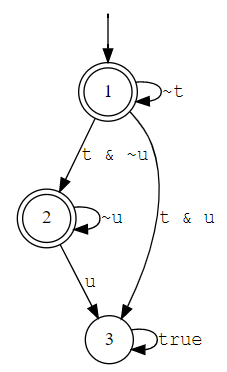

In [19]:
type_constr = 'not_succession'
Q_constr[type_constr] = ['s23', 's24', 's25']
final_states_constr[type_constr] = ['s23', 's24']
init_states_constr[type_constr] = 's23'
rho_constr_basic[type_constr] = []
check_elem1 = 't'
check_elem2 = 'u'

if (check_elem1 not in symbols_constr):
    symbols_constr.append(check_elem1)
if (check_elem2 not in symbols_constr):
    symbols_constr.append(check_elem2)

for i in range(len(symbols_constr)):
    if (symbols_constr[i] != check_elem1):
        rho_constr_basic[type_constr].append('s23 '+symbols_constr[i]+' s23')
    if (symbols_constr[i] == check_elem1 and (symbols_constr[i] != check_elem2)):
        rho_constr_basic[type_constr].append('s23 '+symbols_constr[i]+' s24')
    if (symbols_constr[i] == check_elem2):
        rho_constr_basic[type_constr].append('s24 '+symbols_constr[i]+' s25')
    if (symbols_constr[i] != check_elem2):
        rho_constr_basic[type_constr].append('s24 '+symbols_constr[i]+' s24')
    if (symbols_constr[i] == check_elem1 and (symbols_constr[i] == check_elem2)):
        rho_constr_basic[type_constr].append('s23 '+symbols_constr[i]+' s25')
    
    rho_constr_basic[type_constr].append('s25 '+symbols_constr[i]+' s25')
        

print(rho_constr_basic[type_constr])

['s23 s s23', 's24 s s24', 's25 s s25', 's23 t s24', 's24 t s24', 's25 t s25', 's23 i s23', 's24 i s24', 's25 i s25', 's23 a s23', 's24 a s24', 's25 a s25', 's23 b s23', 's24 b s24', 's25 b s25', 's23 k s23', 's24 k s24', 's25 k s25', 's23 l s23', 's24 l s24', 's25 l s25', 's23 j s23', 's24 j s24', 's25 j s25', 's23 n s23', 's24 n s24', 's25 n s25', 's23 o s23', 's24 o s24', 's25 o s25', 's23 e s23', 's24 e s24', 's25 e s25', 's23 f s23', 's24 f s24', 's25 f s25', 's23 p s23', 's24 p s24', 's25 p s25', 's23 q s23', 's24 q s24', 's25 q s25', 's23 u s23', 's24 u s25', 's25 u s25']


### Not chain succession

G((v <-> !(X(w))))

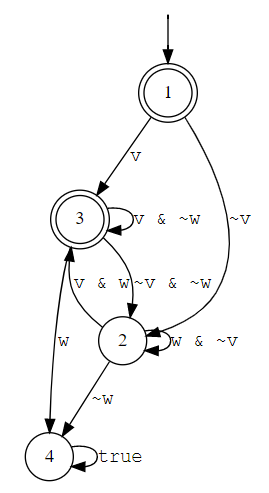

In [20]:
type_constr = 'not_chain_succession'
Q_constr[type_constr] = ['s26', 's27', 's28', 's29']
final_states_constr[type_constr] = ['s26', 's28']
init_states_constr[type_constr] = 's26'
rho_constr_basic[type_constr] = []
check_elem1 = 'v'
check_elem2 = 'w'

if (check_elem1 not in symbols_constr):
    symbols_constr.append(check_elem1)
if (check_elem2 not in symbols_constr):
    symbols_constr.append(check_elem2)

for i in range(len(symbols_constr)):
    if (symbols_constr[i] != check_elem1):
        rho_constr_basic[type_constr].append('s26 '+symbols_constr[i]+' s27')
    if (symbols_constr[i] == check_elem1):
        rho_constr_basic[type_constr].append('s26 '+symbols_constr[i]+' s28')
    if (symbols_constr[i] == check_elem2 and (symbols_constr[i] != check_elem1)):
        rho_constr_basic[type_constr].append('s27 '+symbols_constr[i]+' s27')
    if (symbols_constr[i] == check_elem2 and (symbols_constr[i] == check_elem1)):
        rho_constr_basic[type_constr].append('s27 '+symbols_constr[i]+' s28')
    if (symbols_constr[i] != check_elem2):
        rho_constr_basic[type_constr].append('s27 '+symbols_constr[i]+' s29')
    if (symbols_constr[i] == check_elem1 and (symbols_constr[i] != check_elem2)):
        rho_constr_basic[type_constr].append('s28 '+symbols_constr[i]+' s28')
    if (symbols_constr[i] != check_elem1 and (symbols_constr[i] != check_elem2)):
        rho_constr_basic[type_constr].append('s28 '+symbols_constr[i]+' s27')
    if (symbols_constr[i] == check_elem2):
        rho_constr_basic[type_constr].append('s28 '+symbols_constr[i]+' s29')
    
    rho_constr_basic[type_constr].append('s29 '+symbols_constr[i]+' s29')
        

print(rho_constr_basic[type_constr])

['s26 s s27', 's27 s s29', 's28 s s27', 's29 s s29', 's26 t s27', 's27 t s29', 's28 t s27', 's29 t s29', 's26 i s27', 's27 i s29', 's28 i s27', 's29 i s29', 's26 a s27', 's27 a s29', 's28 a s27', 's29 a s29', 's26 b s27', 's27 b s29', 's28 b s27', 's29 b s29', 's26 k s27', 's27 k s29', 's28 k s27', 's29 k s29', 's26 l s27', 's27 l s29', 's28 l s27', 's29 l s29', 's26 j s27', 's27 j s29', 's28 j s27', 's29 j s29', 's26 n s27', 's27 n s29', 's28 n s27', 's29 n s29', 's26 o s27', 's27 o s29', 's28 o s27', 's29 o s29', 's26 e s27', 's27 e s29', 's28 e s27', 's29 e s29', 's26 f s27', 's27 f s29', 's28 f s27', 's29 f s29', 's26 p s27', 's27 p s29', 's28 p s27', 's29 p s29', 's26 q s27', 's27 q s29', 's28 q s27', 's29 q s29', 's26 u s27', 's27 u s29', 's28 u s27', 's29 u s29', 's26 v s28', 's27 v s29', 's28 v s28', 's29 v s29', 's26 w s27', 's27 w s27', 's28 w s29', 's29 w s29']


## Planning domain D

D = planning domain = (S, A, C, t) \\
where \\
* $S \subseteq 2^{Q_t \cup Q}$ 
* A = {sync\_e, del\_e, add\_e | e $\in \Sigma \cup \Sigma_t$} 
* C(sync_e) = 0 and C(del_e) = C(add_e) = 1
* t

## Planning problem P

## PDDL domain

In [21]:
domain_name = "domain_multi"
problem_name = "problem_multi"

In [22]:
pddl_domain_initial = "(define (domain "+domain_name+") "\
                "(:requirements :strips :typing :action-costs) "\
                "(:types trace_state automaton_state - state activity) "

pddl_domain_predicates = "(:predicates (trace ?t1 - trace_state "\
                            "?e - activity "\
                            "?t2 - trace_state) "\
                            "(automaton ?s1 - automaton_state "\
                            "?e - activity "\
                            "?s2 - automaton_state) "\
                            "(cur_state ?s - state) "\
                            "(final_state ?s - state)) "


pddl_domain_actions =  "(:action sync "\
                        ":parameters (?t1 - trace_state ?e - activity ?t2 - trace_state) "\
                        ":precondition (and (cur_state ?t1) (trace ?t1 ?e ?t2)) "\
                        ":effect(and (not (cur_state ?t1)) (cur_state ?t2) "\
                        "(forall (?s1 ?s2 - automaton_state) "\
                        "(when (and (cur_state ?s1) "\
                        "(automaton ?s1 ?e ?s2)) "\
                        "(and (not (cur_state ?s1)) "\
                        "(cur_state ?s2)))))) "\
                        "(:action add "\
                        ":parameters (?e - activity) "\
                        ":effect (and (increase (total-cost) 1) "\
                        "(forall (?s1 ?s2 - automaton_state) "\
                        "(when (and (cur_state ?s1) "\
                        "(automaton ?s1 ?e ?s2)) "\
                        "(and (not (cur_state ?s1)) "\
                        "(cur_state ?s2)))))) "\
                        "(:action del "\
                        ":parameters (?t1 - trace_state ?e - activity "\
                        "?t2 - trace_state) "\
                        ":precondition (and (cur_state ?t1) (trace ?t1 ?e ?t2)) "\
                        ":effect (and (increase (total-cost) 1) "\
                        "(not (cur_state ?t1)) (cur_state ?t2))))"

pddl_domain = pddl_domain_initial + pddl_domain_predicates + pddl_domain_actions

print (pddl_domain)

(define (domain domain_multi) (:requirements :strips :typing :action-costs) (:types trace_state automaton_state - state activity) (:predicates (trace ?t1 - trace_state ?e - activity ?t2 - trace_state) (automaton ?s1 - automaton_state ?e - activity ?s2 - automaton_state) (cur_state ?s - state) (final_state ?s - state)) (:action sync :parameters (?t1 - trace_state ?e - activity ?t2 - trace_state) :precondition (and (cur_state ?t1) (trace ?t1 ?e ?t2)) :effect(and (not (cur_state ?t1)) (cur_state ?t2) (forall (?s1 ?s2 - automaton_state) (when (and (cur_state ?s1) (automaton ?s1 ?e ?s2)) (and (not (cur_state ?s1)) (cur_state ?s2)))))) (:action add :parameters (?e - activity) :effect (and (increase (total-cost) 1) (forall (?s1 ?s2 - automaton_state) (when (and (cur_state ?s1) (automaton ?s1 ?e ?s2)) (and (not (cur_state ?s1)) (cur_state ?s2)))))) (:action del :parameters (?t1 - trace_state ?e - activity ?t2 - trace_state) :precondition (and (cur_state ?t1) (trace ?t1 ?e ?t2)) :effect (and (i

## PDDL problem

In [23]:
symbols = symbols_constr.copy()
'''print (Q_trace)
print (Q_constr)
print (symbols)
print (rho_trace_basic)
print (rho_constr_basic)'''

'print (Q_trace)\nprint (Q_constr)\nprint (symbols)\nprint (rho_trace_basic)\nprint (rho_constr_basic)'

In [24]:
#type_constraints = ['existence', 'absence2', 'response', 'precedence', 'chain_response','responded_existence', 'chain_precedence', 'not_coexistence', 'not_succession', 'not_chain_succession']
type_constraints = ['not_chain_succession']

pddl_problem_initial = "(define (problem "+problem_name+") (:domain "+domain_name+") "
pddl_problem_objects = "(:objects "

for q in Q_trace:
    pddl_problem_objects += q+" "
pddl_problem_objects += "- trace_state "

for type_constr in type_constraints:
    for q in Q_constr[type_constr]:
        pddl_problem_objects += q+" "
    pddl_problem_objects += "- automaton_state "

for s in symbols:
    pddl_problem_objects += s+" "
pddl_problem_objects += "- activity"

pddl_problem_objects += ") "


pddl_problem_init = "(:init (= (total-cost) 0) (cur_state "+init_state_trace+") "
for trace in rho_trace_basic:
    pddl_problem_init += "(trace "+trace+") "
pddl_problem_init += "(final_state "+final_state_trace+") "

for type_constr in type_constraints:
    pddl_problem_init += "(cur_state "+init_states_constr[type_constr]+") " 
    for trace in rho_constr_basic[type_constr]:
        pddl_problem_init += "(automaton "+trace+") "

    for i in range(len(final_states_constr[type_constr])):
        pddl_problem_init += "(final_state "+final_states_constr[type_constr][i]+") "
pddl_problem_init += ") "


pddl_problem_goal = "(:goal (forall (?s - state) "\
                    "(imply (cur_state ?s) (final_state ?s)))) "
pddl_problem_metric = "(:metric minimize (total-cost)))"
pddl_problem = pddl_problem_initial + pddl_problem_objects + pddl_problem_init + pddl_problem_goal + pddl_problem_metric
print (pddl_problem)

(define (problem problem_multi) (:domain domain_multi) (:objects t0 t1 t2 t3 t4 - trace_state s26 s27 s28 s29 - automaton_state s t i a b k l j n o e f p q u v w - activity) (:init (= (total-cost) 0) (cur_state t0) (trace t0 s t1) (trace t1 t t2) (trace t2 a t3) (trace t3 i t4) (final_state t4) (cur_state s26) (automaton s26 s s27) (automaton s27 s s29) (automaton s28 s s27) (automaton s29 s s29) (automaton s26 t s27) (automaton s27 t s29) (automaton s28 t s27) (automaton s29 t s29) (automaton s26 i s27) (automaton s27 i s29) (automaton s28 i s27) (automaton s29 i s29) (automaton s26 a s27) (automaton s27 a s29) (automaton s28 a s27) (automaton s29 a s29) (automaton s26 b s27) (automaton s27 b s29) (automaton s28 b s27) (automaton s29 b s29) (automaton s26 k s27) (automaton s27 k s29) (automaton s28 k s27) (automaton s29 k s29) (automaton s26 l s27) (automaton s27 l s29) (automaton s28 l s27) (automaton s29 l s29) (automaton s26 j s27) (automaton s27 j s29) (automaton s28 j s27) (autom

## Save .pddl files

In [25]:
file1 = open("PDDL/"+domain_name+".pddl", "w")
file1.write(pddl_domain)
file1.close()

file2 = open("PDDL/"+problem_name+".pddl", "w")
file2.write(pddl_problem)
file2.close()